<a href="https://colab.research.google.com/github/robinsingh2022/NorthwesternMSDS422/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Assignment 3 Part 1

##Ingest

In [ ]:
import pandas as pd

In [ ]:
path='/content/drive/MyDrive/Assignment3/train.csv'
df = pd.read_csv(path)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
df.Age.count()>=50

True

In [ ]:
df['above50'] = df.Age.apply(lambda x: 1 if x >= 50 else 0)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,above50
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [ ]:
df.above50.unique()

array([0, 1])

##EDA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

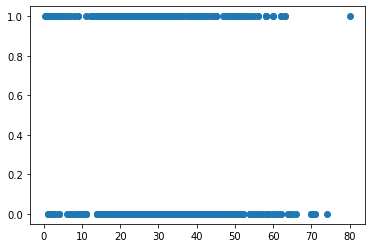

In [ ]:
plt.scatter(df.Age, df.Survived)

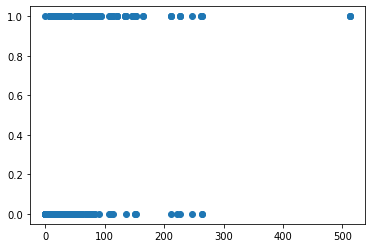

In [ ]:
plt.scatter(df.Fare, df.Survived)

##Logistic Regression Model with Age Impact on Survival

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df2=df[['Age','Survived']].copy()

In [ ]:
df2=df2.dropna()

In [ ]:
x=df2[['Age']]
y=df2['Survived']

In [ ]:
logReg=LogisticRegression()
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
path='/content/drive/MyDrive/Assignment3/test.csv'
test=pd.read_csv(path)

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test2=test[['Age']].copy()

In [ ]:

test2=test2.dropna()

In [ ]:
logReg.predict(test2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
test2['SurvivalPrediction']=logReg.predict(test2)
test2

,Age,SurvivalPrediction
0,34.5,0
1,47.0,0
2,62.0,0
3,27.0,0
4,22.0,0
...,...,...
409,3.0,0
411,37.0,0
412,28.0,0
414,39.0,0


##Logistic Regression Model with Age above 50, Sex, Fare Price, and Pclass impact on Survival

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,above50
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [ ]:
df['sexBin'] = df.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [ ]:
df=df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,above50,sexBin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['above50','sexBin','Fare','Pclass']],df['Survived'],train_size=0.90)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
x_train

,above50,sexBin,Fare,Pclass
337,0,0,134.5000,1
779,0,0,211.3375,1
763,0,0,120.0000,1
571,1,0,51.4792,1
587,1,1,79.2000,1
...,...,...,...,...
802,0,1,120.0000,1
857,1,1,26.5500,1
699,0,1,7.6500,3
257,0,0,86.5000,1


In [ ]:
y_train

337    1
779    1
763    1
571    1
587    1
      ..
802    1
857    1
699    0
257    1
309    1
Name: Survived, Length: 164, dtype: int64

In [ ]:
logReg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test['sexBin'] = test.Sex.apply(lambda x: 1 if x == 'male' else 0)
test['above50'] = test.Age.apply(lambda x: 1 if x >= 50 else 0)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sexBin,above50
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,0


In [ ]:
test2=test[['above50','sexBin','Pclass','Fare' ]].copy()

In [ ]:
test2=test2.dropna()

In [ ]:
predModel=test2

In [ ]:
logReg.predict(predModel)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
test2['SurvivalPrediction']=logReg.predict(test2)

In [ ]:
test2

,above50,sexBin,Pclass,Fare,SurvivalPrediction
0,0,1,3,7.8292,0
1,0,0,3,7.0000,1
2,1,1,2,9.6875,0
3,0,1,3,8.6625,0
4,0,0,3,12.2875,0
...,...,...,...,...,...
413,0,1,3,8.0500,0
414,0,0,1,108.9000,0
415,0,1,3,7.2500,0
416,0,1,3,8.0500,0


In [ ]:
probs=logReg.predict_proba(x_test)

In [ ]:
probs=probs[:,1]

In [ ]:
auc=roc_auc_score(y_test,probs)
print('AUC score=',auc)

AUC score= 0.9666666666666668


In [ ]:
y_test=pd.array(y_test)
y_test

<PandasArray>
[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0]
Length: 19, dtype: int64

In [ ]:
probs

array([0.79799925, 0.55232675, 0.92937313, 0.92775715, 0.9277233 ,
       0.92753929, 0.35434966, 0.55423841, 0.92736023, 0.55569214,
       0.92710106, 0.35702617, 0.35532918, 0.56961894, 0.55247345,
       0.92752281, 0.55243064, 0.55894885, 0.55262756])

In [ ]:
falsePos, truePos, _ = roc_curve(y_test , probs)

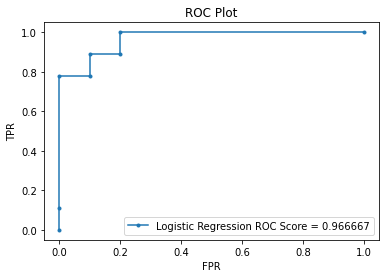

In [ ]:
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

Without using test, train split

In [ ]:
x=df[['above50','sexBin','Fare','Pclass']]
y=df['Survived']
logReg.fit(x,y)
test3=test[['above50','sexBin','Pclass','Fare' ]].copy()
test3=test3.dropna()
logReg.predict(test3)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
probs=logReg.predict_proba(x)
probs=probs[:,1]
auc=roc_auc_score(y,probs)
print('AUC score=',auc)

AUC score= 0.8241869918699188


In [ ]:
falsePos, truePos, _ = roc_curve(y , probs)

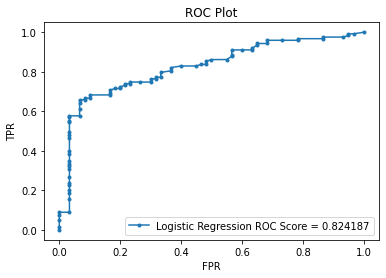

In [ ]:
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Gaussian NB Model with Age above 50, Sex, Fare Price, and Pclass impact on Survival 

In [ ]:
from sklearn.naive_bayes import GaussianNB
gausNB=GaussianNB()

In [ ]:
x_train

,above50,sexBin,Fare,Pclass
337,0,0,134.5000,1
779,0,0,211.3375,1
763,0,0,120.0000,1
571,1,0,51.4792,1
587,1,1,79.2000,1
...,...,...,...,...
802,0,1,120.0000,1
857,1,1,26.5500,1
699,0,1,7.6500,3
257,0,0,86.5000,1


In [ ]:
gausNB.fit(x_train,y_train)
test3=test[['above50','sexBin','Pclass','Fare' ]].copy()

In [ ]:
test3=test3.dropna()
gausNB.predict(test3)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,above50,sexBin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0


In [ ]:
x=df[['above50','sexBin','Pclass','Fare' ]].copy()

In [ ]:
y=df["Survived"].copy()

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(test3)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
probs=gausNB.predict_proba(x)

In [ ]:
probs=probs[:,1]

In [ ]:
auc=roc_auc_score(y,probs)
print('AUC score=',auc)

AUC score= 0.8167344173441734


In [ ]:
falsePos, truePos, _ = roc_curve(y , probs)

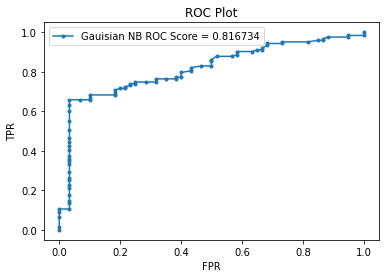

In [ ]:
plt.plot(falsePos, truePos, marker='.', label='Gauisian NB ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Binary Varables Only Models

##Logistic Regression Model with Low Class, Low Fare, Male, and above age 50 impact on Survival

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,above50,sexBin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0


In [ ]:
df.PassengerId.mean()

455.3661202185792

In [ ]:
df.Fare.mean()

78.68246885245901

In [ ]:
df3=pd.DataFrame()
df3['low_class']=df.Pclass.apply(lambda x: 1 if x == 3 else 0)
df3['lowFare'] = df.Fare.apply(lambda x: 1 if x <= df.Fare.mean() else 0)
df3['male'] = df['sexBin'].copy()
df3['above50'] = df['above50'].copy()
df3

,low_class,lowFare,male,above50
1,0,1,0,0
3,0,1,0,0
6,0,1,1,1
10,1,1,0,0
11,0,1,0,1
...,...,...,...,...
871,0,1,0,0
872,0,1,1,0
879,0,0,0,1
887,0,1,0,0


In [ ]:
df3['Survived']=df['Survived'].copy()
df3

,low_class,lowFare,male,above50,Survived
1,0,1,0,0,1
3,0,1,0,0,1
6,0,1,1,1,0
10,1,1,0,0,1
11,0,1,0,1,1
...,...,...,...,...,...
871,0,1,0,0,1
872,0,1,1,0,0
879,0,0,0,1,1
887,0,1,0,0,1


In [ ]:
x=df3[['low_class','lowFare', 'male','above50']]
y=df3['Survived']

In [ ]:
logReg=LogisticRegression()
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sexBin,above50
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,0


In [ ]:
testBinary=pd.DataFrame()
testBinary['low_class']=test.Pclass.apply(lambda x: 1 if x == 3 else 0)
testBinary['lowFare'] = test.Fare.apply(lambda x: 1 if x <= df.Fare.mean() else 0)
testBinary['male'] = test['sexBin'].copy()
testBinary['above50'] = test['above50'].copy()
testBinary

,low_class,lowFare,male,above50
0,1,1,1,0
1,1,1,0,0
2,0,1,1,1
3,1,1,1,0
4,1,1,0,0
...,...,...,...,...
413,1,1,1,0
414,0,0,0,0
415,1,1,1,0
416,1,1,1,0


In [ ]:
logReg.predict(testBinary)

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
prob=logReg.predict_proba(x)

In [ ]:
prob=prob[:,1]

In [ ]:
auc2=roc_auc_score(y,prob)

In [ ]:
print("AUC_Score=",auc2)

AUC_Score= 0.8230352303523034


In [ ]:
falsePos, truePos, _ = roc_curve(y , prob)

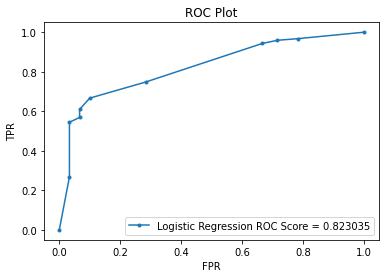

In [ ]:
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Gaussian NB Model with Low Class, Low Fare, Male, and above age 50 impact on Survival

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(testBinary)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
prob=gausNB.predict_proba(x)

In [ ]:
prob=prob[:,1]

In [ ]:
auc2=roc_auc_score(y,prob)

In [ ]:
print("AUC_Score=",auc2)

AUC_Score= 0.8182926829268294


In [ ]:
falsePos, truePos,_= roc_curve(y , prob)

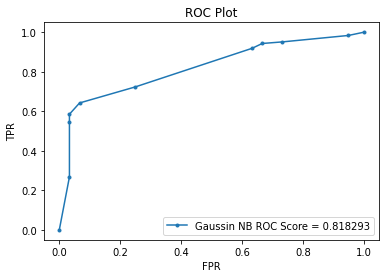

In [ ]:
plt.plot(falsePos, truePos, marker='.', label='Gaussin NB ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Individual Variable Impact on Survival

Low class on Survived Logistic

In [ ]:
df3

,low_class,lowFare,male,above50,Survived
1,0,1,0,0,1
3,0,1,0,0,1
6,0,1,1,1,0
10,1,1,0,0,1
11,0,1,0,1,1
...,...,...,...,...,...
871,0,1,0,0,1
872,0,1,1,0,0
879,0,0,0,1,1
887,0,1,0,0,1


In [ ]:

x=df3[['low_class']]
y=df3['Survived']

In [ ]:
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
testingIndiv=testBinary[['low_class']]


In [ ]:
logReg.predict(testingIndiv)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
prob=logReg.predict_proba(x)

In [ ]:
prob=prob[:,1]

In [ ]:
auc2=roc_auc_score(y,prob)

In [ ]:
print("AUC_Score=",auc2)

AUC_Score= 0.5213414634146342


In [ ]:
falsePos, truePos,_= roc_curve(y , prob)

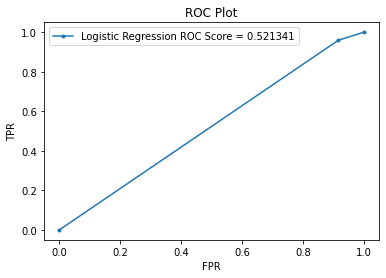

In [ ]:
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

Low class on survived NB

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(testingIndiv)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
prob=gausNB.predict_proba(x)
prob=prob[:,1]
auc2=roc_auc_score(y,prob)
print("AUC_Score=",auc2)

AUC_Score= 0.5213414634146342


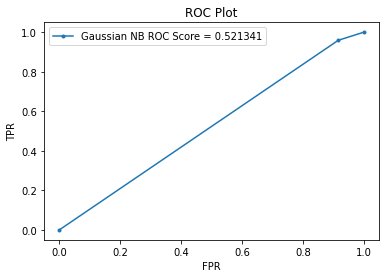

In [ ]:
falsePos, truePos,_= roc_curve(y , prob)
plt.plot(falsePos, truePos, marker='.', label='Gaussian NB ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

Low fare on survived (logistic)

In [ ]:
x=df3[['lowFare']]
y=df3['Survived']
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
testingIndiv=testBinary[['lowFare']]
logReg.predict(testingIndiv)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
prob=logReg.predict_proba(x)
prob=prob[:,1]
auc2=roc_auc_score(y,prob)
print("AUC_Score=",auc2)

AUC_Score= 0.5575203252032521


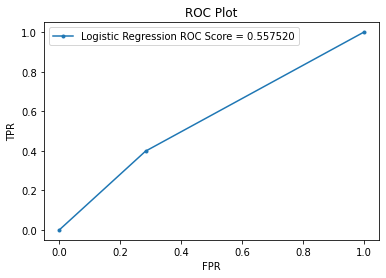

In [ ]:
falsePos, truePos,_= roc_curve(y , prob)
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

low fare on survived 

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(testingIndiv)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
prob=gausNB.predict_proba(x)
prob=prob[:,1]
auc2=roc_auc_score(y,prob)
print("AUC_Score=",auc2)

AUC_Score= 0.5575203252032521


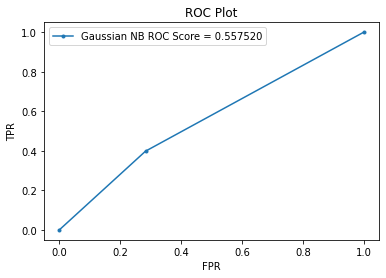

In [ ]:
falsePos, truePos,_= roc_curve(y , prob)
plt.plot(falsePos, truePos, marker='.', label='Gaussian NB ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

For 'male' variable logistic

In [ ]:
x=df3[['male']]
y=df3['Survived']
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
testingIndiv=testBinary[['male']]
logReg.predict(testingIndiv)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
prob=logReg.predict_proba(x)
prob=prob[:,1]
auc2=roc_auc_score(y,prob)
print("AUC_Score=",auc2)

AUC_Score= 0.7833333333333333


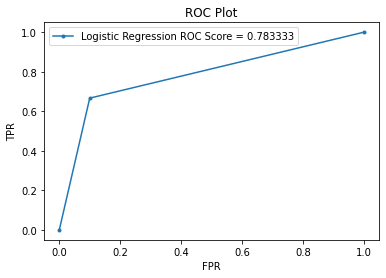

In [ ]:
falsePos, truePos,_= roc_curve(y , prob)
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

Male on survived NB

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(testingIndiv)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
prob=gausNB.predict_proba(x)
prob=prob[:,1]
auc2=roc_auc_score(y,prob)
print("AUC_Score=",auc2)

AUC_Score= 0.7833333333333333


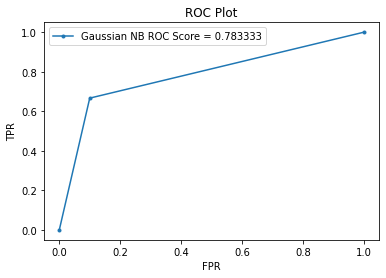

In [ ]:
falsePos, truePos,_= roc_curve(y , prob)
plt.plot(falsePos, truePos, marker='.', label='Gaussian NB ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

For 'above50' varaible logistic

In [ ]:
x=df3[['above50']]
y=df3['Survived']
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
testingIndiv=testBinary[['above50']]
logReg.predict(testingIndiv)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
prob=logReg.predict_proba(x)
prob=prob[:,1]
auc2=roc_auc_score(y,prob)
print("AUC_Score=",auc2)

AUC_Score= 0.5892276422764228


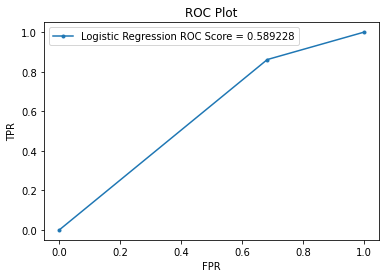

In [ ]:
falsePos, truePos,_= roc_curve(y , prob)
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

above50 on survived NB

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(testingIndiv)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
prob=gausNB.predict_proba(x)
prob=prob[:,1]
auc2=roc_auc_score(y,prob)
print("AUC_Score=",auc2)

AUC_Score= 0.5892276422764228


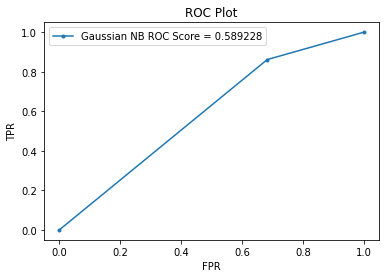

In [ ]:
falsePos, truePos,_= roc_curve(y , prob)
plt.plot(falsePos, truePos, marker='.', label='Gaussian NB ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

above mean age on survived Logistic

In [ ]:
df['Age'].mean()

35.6744262295082

In [ ]:
df['aboveAvgAge'] = df.Age.apply(lambda x: 1 if x > df['Age'].mean() else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,above50,sexBin,aboveAvgAge
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,0,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0,1,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0


In [ ]:
x=df[['aboveAvgAge']]
y=df['Survived']

In [ ]:
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sexBin,above50
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,0


In [ ]:
test['aboveAvgAge'] = test.Age.apply(lambda x: 1 if x > df['Age'].mean() else 0)

In [ ]:
testingIndiv=test[['aboveAvgAge']]
logReg.predict(testingIndiv)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
prob=logReg.predict_proba(x)
prob=prob[:,1]
auc2=roc_auc_score(y,prob)
print("AUC_Score=",auc2)

AUC_Score= 0.6302845528455284


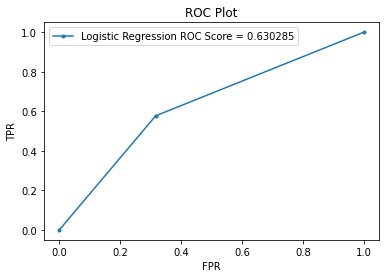

In [ ]:
falsePos, truePos,_= roc_curve(y , prob)
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

above mean age NB

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(testingIndiv)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
prob=gausNB.predict_proba(x)
prob=prob[:,1]
auc2=roc_auc_score(y,prob)
print("AUC_Score=",auc2)

AUC_Score= 0.6302845528455284


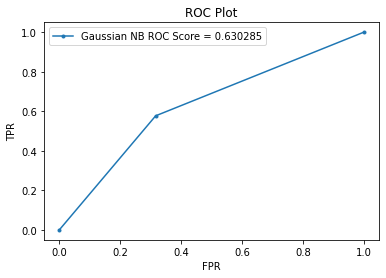

In [ ]:
falsePos, truePos,_= roc_curve(y , prob)
plt.plot(falsePos, truePos, marker='.', label='Gaussian NB ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Model with aboveAvgAge used instead of above50, low_class, lowFare, and male impact on survival (Logistic)

In [ ]:
df4=pd.DataFrame()
df4['low_class']=df.Pclass.apply(lambda x: 1 if x == 3 else 0)
df4['lowFare'] = df.Fare.apply(lambda x: 1 if x <= df.Fare.mean() else 0)
df4['male'] = df['sexBin'].copy()
df4['aboveAvgAge'] = df['aboveAvgAge'].copy()
df4

,low_class,lowFare,male,aboveAvgAge
1,0,1,0,1
3,0,1,0,0
6,0,1,1,1
10,1,1,0,0
11,0,1,0,1
...,...,...,...,...
871,0,1,0,1
872,0,1,1,0
879,0,0,0,1
887,0,1,0,0


In [ ]:
df4['Survived']=df['Survived'].copy()
df4

,low_class,lowFare,male,aboveAvgAge,Survived
1,0,1,0,1,1
3,0,1,0,0,1
6,0,1,1,1,0
10,1,1,0,0,1
11,0,1,0,1,1
...,...,...,...,...,...
871,0,1,0,1,1
872,0,1,1,0,0
879,0,0,0,1,1
887,0,1,0,0,1


In [ ]:
x=df4[['low_class','lowFare', 'male','aboveAvgAge']]
y=df4['Survived']

In [ ]:
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test['aboveAvgAge'] = test.Age.apply(lambda x: 1 if x > df['Age'].mean() else 0)
testBinary2=pd.DataFrame()
testBinary2['low_class']=test.Pclass.apply(lambda x: 1 if x == 3 else 0)
testBinary2['lowFare'] = test.Fare.apply(lambda x: 1 if x <= df.Fare.mean() else 0)
testBinary2['male'] = test['sexBin'].copy()
testBinary2['aboveAvgAge'] = test['aboveAvgAge'].copy()
testBinary2

,low_class,lowFare,male,aboveAvgAge
0,1,1,1,0
1,1,1,0,1
2,0,1,1,1
3,1,1,1,0
4,1,1,0,0
...,...,...,...,...
413,1,1,1,0
414,0,0,0,1
415,1,1,1,1
416,1,1,1,0


In [ ]:
logReg.predict(testBinary2)

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
prob=logReg.predict_proba(x)
prob=prob[:,1]
auc2=roc_auc_score(y,prob)
print("AUC_Score=",auc2)

AUC_Score= 0.8283197831978318


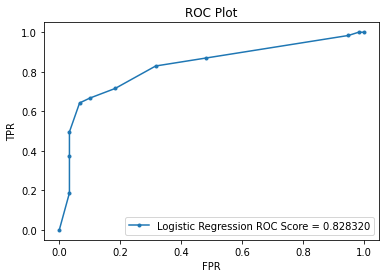

In [ ]:
falsePos, truePos,_= roc_curve(y , prob)
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Model with aboveAvgAge used instead of above50, low_class, lowFare, and male impact on survival (Gaussian NB)

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(testBinary2)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
prob=gausNB.predict_proba(x)
prob=prob[:,1]
auc2=roc_auc_score(y,prob)
print("AUC_Score=",auc2)

AUC_Score= 0.8257452574525744


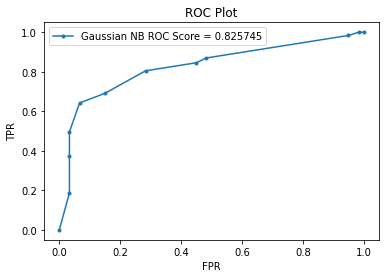

In [ ]:
falsePos, truePos,_= roc_curve(y , prob)
plt.plot(falsePos, truePos, marker='.', label='Gaussian NB ROC Score = %f' %auc2)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Conclusion

If I was providing evidence regarding characteristics associated with survival on this ill-fated voyage to a historian writing a book, I would use the logistic regression model, as according to a cross-validation design, the logistic regression model had returned a Greater Receiver Operating Characteristic Area Under the Curve score of 0.8283197831978318 in my best model using the binary variables low,class, lowFare, male, and aboveAvgAge, compared to the Area Under the Curve score of 0.8257452574525744 from the Gaussian naïve Bayes model. 

Both of these models, however, are better than a linear regression model which was one of the primary focuses of last week’s assignment. This is because that tries to fit everything to one straight line, which definitely may not always be the best fit. A logistic regression curves to better fit the data and may better at fitting the data to the line with a lower error rate. 

Throughout the process of creating my model, I tried to think about who would be least likely to survive in the Titanic scenario, and to my immediate thought I believed the high aged, male individuals of a lower class, who in turn payed a lower fare, may have been the least likely to survive.  Perhaps they were not prioritized in terms of help received to get them off the ship to safety as much as the high wealth individuals. Also, women and children may have been more prioritized as well. High aged individuals may not have found it easy to move quickly around the ship and may have collapsed in the commotion. They may have even thought from a moralistic point of view to rather help those who had longer lives to live than themselves. 

Of those variables, the best variable that best allowed us to predict the outcomes with the greatest Area Under the Curve Score was AGE, as that was the greatest determining factor in whether that individual survived or not. It had a score of 0.6302845528455284 when converted to a binary variable of whether they were below or above the mean, compared to the others which had scored below 0.60. 


##Assignment 3 Part 2

##Ingest

In [ ]:
RANDOM_SEED = 1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path='/content/drive/MyDrive/Assignment3/bank.csv'
bank = pd.read_csv('bank.csv', sep = ';')

##EDA

In [ ]:
print(bank.shape)

(4521, 17)


In [ ]:
bank.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
print(bank.shape)

(4521, 17)


In [ ]:
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
convert_to_binary = {'no' : 0, 'yes' : 1}

In [ ]:
default = bank['default'].map(convert_to_binary)

In [ ]:
housing = bank['housing'].map(convert_to_binary)



In [ ]:
loan = bank['loan'].map(convert_to_binary)

In [ ]:
response = bank['response'].map(convert_to_binary)

In [ ]:
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T


In [ ]:
print(model_data.shape)

(4521, 4)


In [ ]:
model_data

array([[0, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 0]])

##Logistic Regression Model

In [ ]:
x=model_data[:,:-1]
y=model_data[:,-1] 

In [ ]:
x

array([[0, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 1]])

In [ ]:
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logReg.predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
probs=logReg.predict_proba(x)
probs=probs[:,1]
auc=roc_auc_score(y,probs)
print('AUC score=',auc)

AUC score= 0.6086717850287908


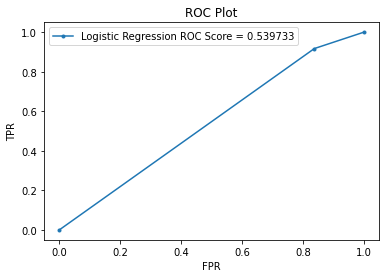

In [ ]:
falsePos, truePos, _ = roc_curve(y , probs)
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Logistic Regression Model with 90% Train / 10% Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.90)

In [ ]:
logReg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logReg.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
probs=logReg.predict_proba(x_test)
probs=probs[:,1]
auc=roc_auc_score(y_test,probs)
print('AUC score=',auc)

AUC score= 0.6556685210051794


In [ ]:
falsePos, truePos, _ = roc_curve(y_test , probs)

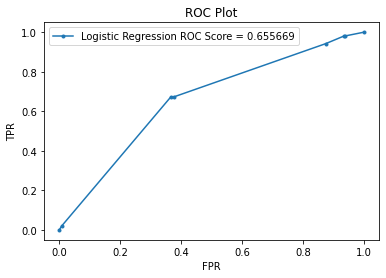

In [ ]:
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Gaussian NB Model

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
probs=gausNB.predict_proba(x)
probs=probs[:,1]
auc=roc_auc_score(y,probs)
print('AUC score=',auc)

AUC score= 0.6056813819577735


In [ ]:
falsePos, truePos, _ = roc_curve(y , probs)

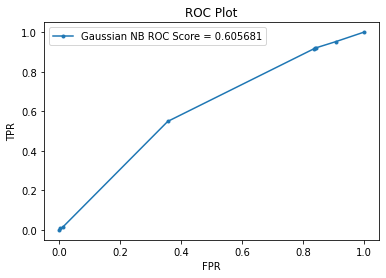

In [ ]:
plt.plot(falsePos, truePos, marker='.', label='Gaussian NB ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Gaussian NB Model with 90% Train/ 10% Test Split

In [ ]:
gausNB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
probs=gausNB.predict_proba(x_test)
probs=probs[:,1]
auc=roc_auc_score(y_test,probs)
print('AUC score=',auc)

AUC score= 0.6490504507960867


In [ ]:
falsePos, truePos, _ = roc_curve(y_test , probs)

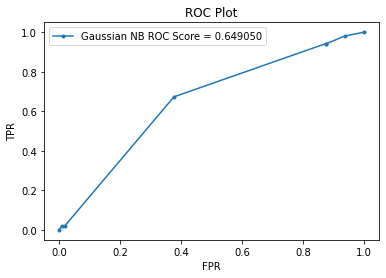

In [ ]:
plt.plot(falsePos, truePos, marker='.', label='Gaussian NB ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Individual Varaible Models (To see individual Relationships to Response)

Using 'Default' Logistic

In [ ]:
x=model_data[:,0]
y=model_data[:,-1] 

In [ ]:
x=np.array(x)
x = np.reshape(x, (4521, 1))
x

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logReg.predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
probs=logReg.predict_proba(x)
probs=probs[:,1]
auc=roc_auc_score(y,probs)
print('AUC score=',auc)

AUC score= 0.500262236084453


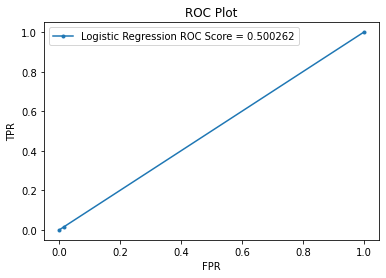

In [ ]:
falsePos, truePos, _ = roc_curve(y , probs)
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

Using 'Default' NB

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
probs=gausNB.predict_proba(x)
probs=probs[:,1]
auc=roc_auc_score(y,probs)
print('AUC score=',auc)

AUC score= 0.500262236084453


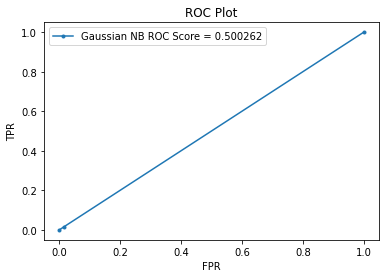

In [ ]:
falsePos, truePos, _ = roc_curve(y , probs)
plt.plot(falsePos, truePos, marker='.', label='Gaussian NB ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

Using 'Housing' Logistic

In [ ]:
x=model_data[:,1]
x=np.array(x)
x = np.reshape(x, (4521, 1))
x

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logReg.predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
probs=logReg.predict_proba(x)
probs=probs[:,1]
auc=roc_auc_score(y,probs)
print('AUC score=',auc)

AUC score= 0.5812425623800385


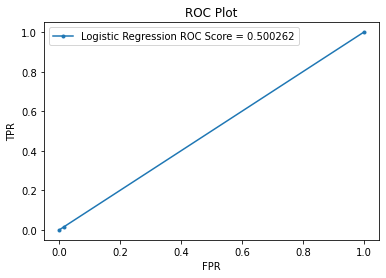

In [ ]:
falsePos, truePos, _ = roc_curve(y , probs)
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

Using 'Housing' NB

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
probs=gausNB.predict_proba(x)
probs=probs[:,1]
auc=roc_auc_score(y,probs)
print('AUC score=',auc)

AUC score= 0.5812425623800385


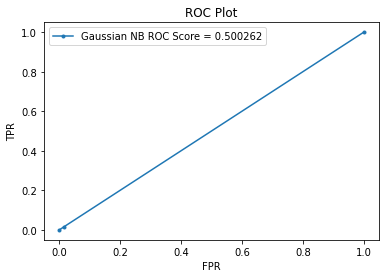

In [ ]:
falsePos, truePos, _ = roc_curve(y , probs)
plt.plot(falsePos, truePos, marker='.', label='Gaussian NB ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

Using 'Loan' Logistic

In [ ]:
x=model_data[:,2]
x=np.array(x)
x = np.reshape(x, (4521, 1))
x

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
logReg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logReg.predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
probs=logReg.predict_proba(x)
probs=probs[:,1]
auc=roc_auc_score(y,probs)
print('AUC score=',auc)

AUC score= 0.5397332053742803


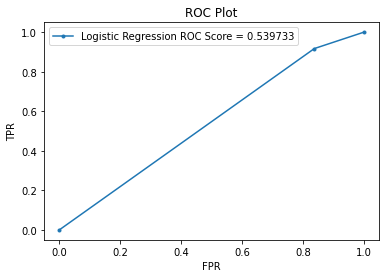

In [ ]:
falsePos, truePos, _ = roc_curve(y , probs)
plt.plot(falsePos, truePos, marker='.', label='Logistic Regression ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

Using 'Loan' NB

In [ ]:
gausNB.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausNB.predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
probs=gausNB.predict_proba(x)
probs=probs[:,1]
auc=roc_auc_score(y,probs)
print('AUC score=',auc)

AUC score= 0.5397332053742803


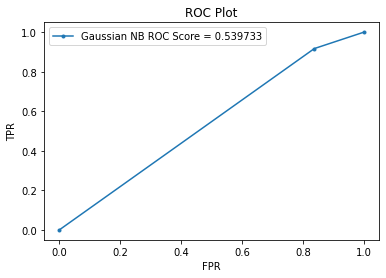

In [ ]:
falsePos, truePos, _ = roc_curve(y , probs)
plt.plot(falsePos, truePos, marker='.', label='Gaussian NB ROC Score = %f' %auc)
plt.title('ROC Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend() 
plt.show()

##Conclusion

If I was advising the bank about machine learning methods to guide telephone marketing campaigns, of the two modeling methods I would choose the logistic regression model compared to the Gaussian naïve Bayes model. This is because the logistic model had given me greater Area Under the Curve scores compared to the Gaussian naïve Bayes models. The Logistic regression model gave me 0.6086717850287908 as opposed to 0.6056813819577735 that the Gaussian naïve Bayes model had given my in the model without using the train-test split. However, even in the train test split models, I had received a greater score with the logistic regression model than the Gaussian naïve Bayes model: 0.6556685210051794 from the logistic regression model with a 90% train/10% split compared to 0.6490504507960867 of the Gaussian naïve Bayes model with the exact same split. 

Of the three variables we were supposed to analyze against the response variable, which were whether the individual defaulted, had housing, or had a loan, the housing variable was what contributed to a “yes” response to whether they had subscribed to a term deposit, the best. It had the greatest ROC Area Under the Curve Score of approximately 0.58 for both the logistic regression models and the Gaussian naïve Bayes models. The other variables, default and loan, both had around 0.50 and 0.53 respectively as their ROC Area Under the Curve Scores. Hence, they should be the individuals the bank should dedicate their resources towards. 
